In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Read Data set**

In [ ]:
data  = pd.read_csv("/content/spam.csv",encoding='latin-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data = data.rename(columns = {"v1":"Identifier","v2":"Text"})

In [ ]:
data.head()

,Identifier,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.describe()

,Identifier,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.groupby("Identifier")["Identifier"].agg('count')

Identifier
ham     4825
spam     747
Name: Identifier, dtype: int64

In [ ]:
data['TextLength'] = data['Text'].apply(len)
data.head()

,Identifier,Text,TextLength
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Visualize data

In [ ]:
import seaborn as sb

<Axes: ylabel='Frequency'>

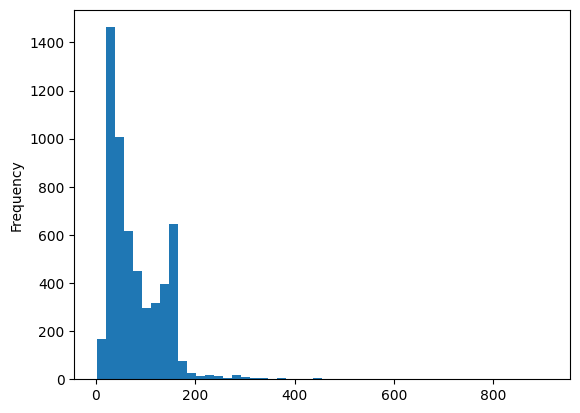

In [ ]:
data['TextLength'].plot(bins= 50,kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

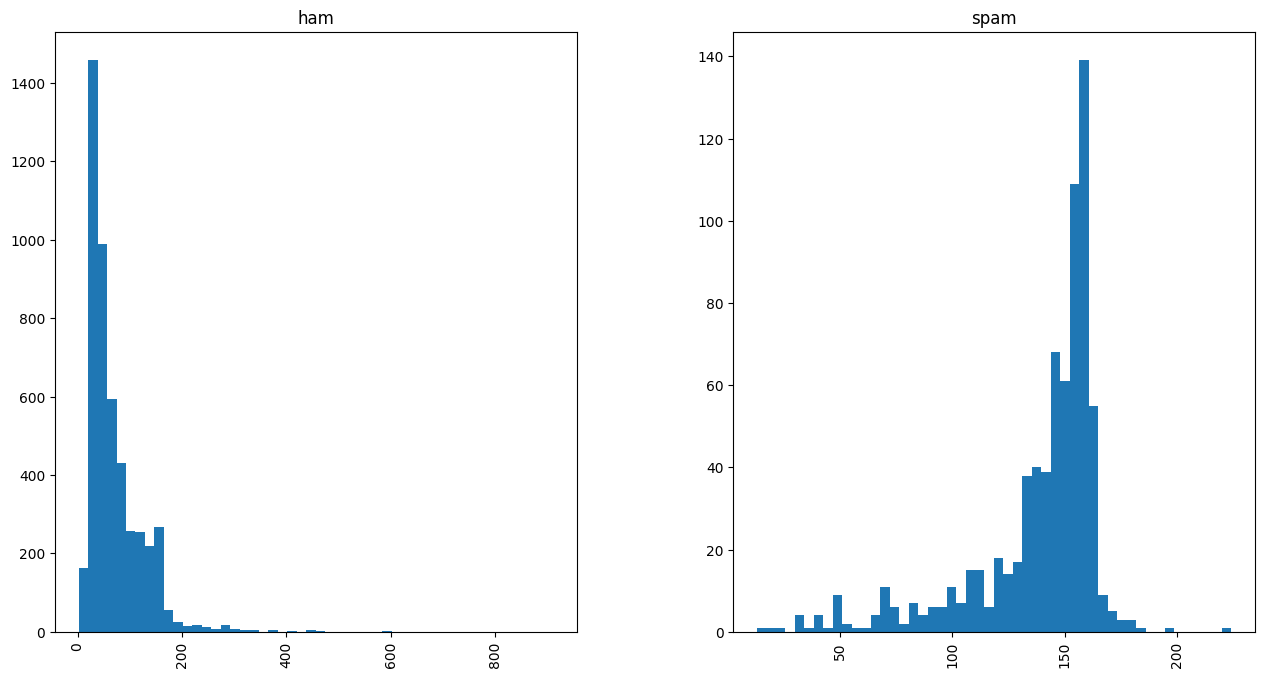

In [ ]:
data.hist(column= 'TextLength',by='Identifier',bins =50,figsize=(15,8))

**Encording**

In [ ]:
data = pd.get_dummies(data, columns= ['Identifier'],drop_first=True)

In [ ]:
data.head()

,Text,TextLength,Identifier_spam
0,"Go until jurong point, crazy.. Available only ...",111,0
1,Ok lar... Joking wif u oni...,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,U dun say so early hor... U c already then say...,49,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0


**Implement Bag of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
Text = count.fit_transform(data['Text'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Text,data['Identifier_spam'],test_size=0.2,random_state=1)
Text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4457, 8672)
(1115, 8672)


**Implementation of model**

*Naive bayes*

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB()
model_NB.fit(x_train,y_train)

MultinomialNB()

In [ ]:
prediction = model_NB.predict(x_test)

In [ ]:
print(prediction)

[0 0 0 ... 0 0 0]


**Check the accuracy and precision of the model**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
print("Multinomial NB")
print("Accuracy Score: {}".format(accuracy_score(y_test,prediction)))
print("Precision Score: {}".format(precision_score(y_test,prediction)))
print("Recall Score: {}".format(recall_score(y_test,prediction)))
print("f1 Score: {}".format(f1_score(y_test,prediction)))

Multinomial NB
Accuracy Score: 0.9865470852017937
Precision Score: 0.984375
Recall Score: 0.9064748201438849
f1 Score: 0.9438202247191011


In [ ]:
from sklearn.naive_bayes import BernoulliNB

model_NB = BernoulliNB()
model_NB.fit(x_train,y_train)

BernoulliNB()

In [ ]:
prediction = model_NB.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
print("Bernuli NB")
print("Accuracy Score: {}".format(accuracy_score(y_test,prediction)))
print("Precision Score: {}".format(precision_score(y_test,prediction)))
print("Recall Score: {}".format(recall_score(y_test,prediction)))
print("f1 Score: {}".format(f1_score(y_test,prediction)))

Bernuli NB
Accuracy Score: 0.9865470852017937
Precision Score: 0.984375
Recall Score: 0.9064748201438849
f1 Score: 0.9438202247191011


In [ ]:
input = 'Hurryup soon!!!'
input = count.fit_transform(data['Text'],input)
input
model_NB.predict(input)

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

**Check the built model predictions**

In [ ]:
new_text = ["Congratulations! You've won a free vacation! Click the link to claim your prize"]
new_text_counts= count.transform(new_text)

prediction = model_NB.predict(new_text_counts)
print(f"The predicted class for new text is :{prediction}")

The predicted class for new text is :[1]


In [ ]:
new_text = ["This is another text"]
new_text_counts= count.transform(new_text)

prediction = model_NB.predict(new_text_counts)
print(f"The predicted class for new text is :{prediction}")

The predicted class for new text is :[0]
